<a href="https://colab.research.google.com/github/VladislavEpifanow/Prediction-of-user-churn/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Для начала посмотрим на сами данные

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data.shape

(5282, 20)

Вытащим 5 случайных значений из выборки:


In [ ]:
data.iloc[np.random.random_integers(0, data.shape[0],size = 5)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 5282 + 1) instead
  """Entry point for launching an IPython kernel.


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1064,30,21.25,711.9,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
5168,26,19.60,471.85,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
359,48,111.80,5443.65,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
1054,70,20.05,1360.25,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
448,46,69.10,3255.35,Female,1,No,No,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),0


Теперь посмотрим информацию о данных и о пропусках: 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
# Заменим пропуски в nan
data = data.replace(' ', np.nan)

In [ ]:
# Проверка пропущенных значений
data.isnull().any().any()

True

In [ ]:
# Построим табличку с количеством nan в каждой строчке
data.iloc[:].isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Как можно в столбце TotalSpent было 9 пропущенных данных, удалим их:

In [ ]:
data = data.dropna()

Также видно, что числовой признак представлен в датасете как объект, поменяем ему тип:

In [ ]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

In [ ]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5273.000000,5273.000000,5273.000000,5273.000000,5273.000000
mean,32.452304,64.956770,2291.390461,0.159681,0.262469
std,24.534723,30.177911,2269.014233,0.366345,0.440018
min,1.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.500000,401.100000,0.000000,0.000000
50%,29.000000,70.450000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3807.350000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
plt.style.use('seaborn')

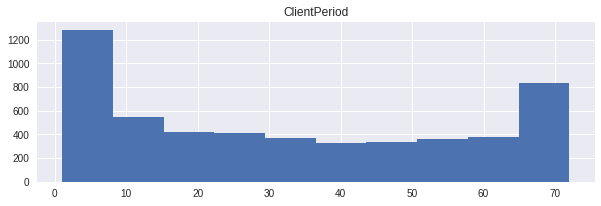

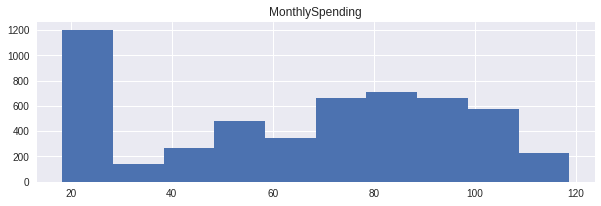

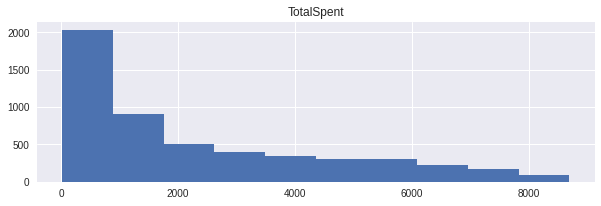

In [ ]:
for i, cat in enumerate(num_cols):
  plt.figure(figsize=(10,10))
  plt.subplot(3,1,i+1)
  plt.hist(data[cat])
  plt.title(cat)

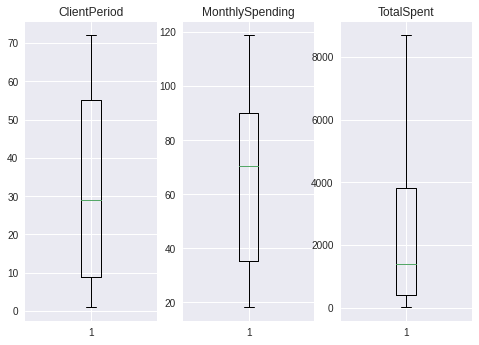

In [ ]:
for i, cat in enumerate(num_cols):
  plt.subplot(1,3,i+1)
  plt.boxplot(data[cat])
  plt.title(cat)

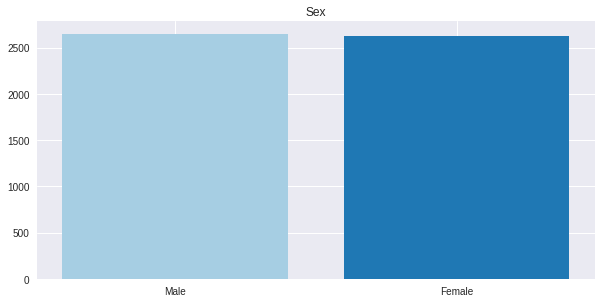

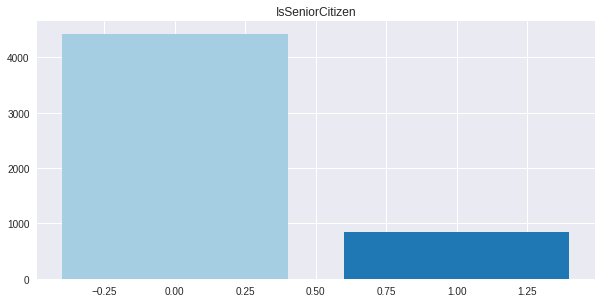

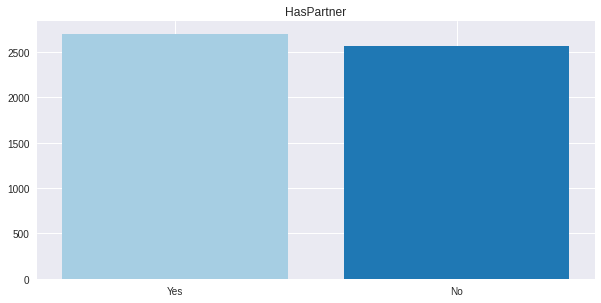

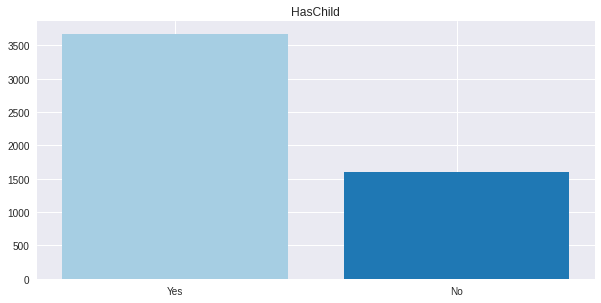

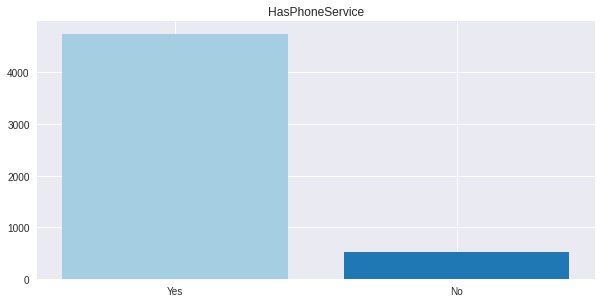

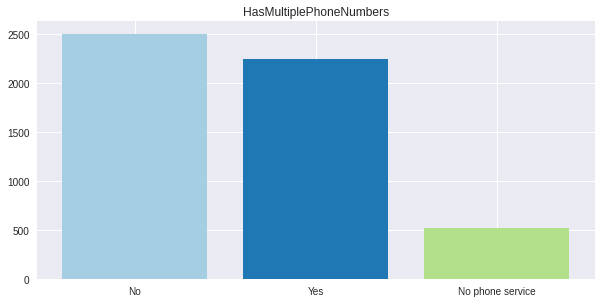

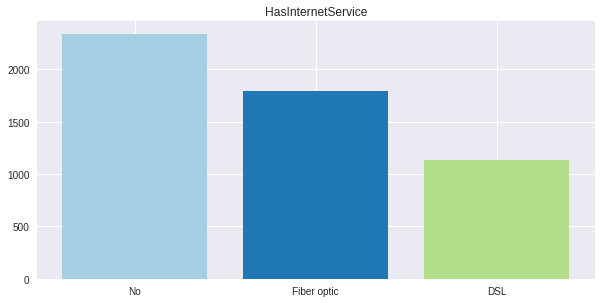

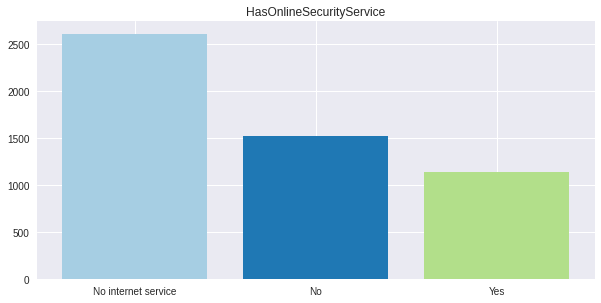

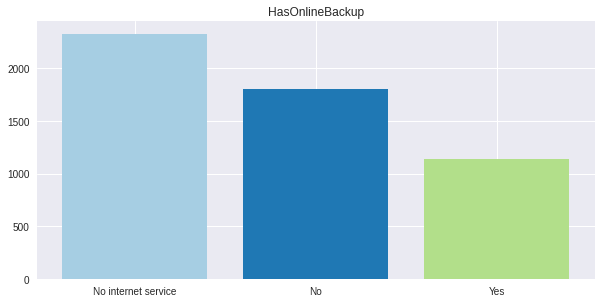

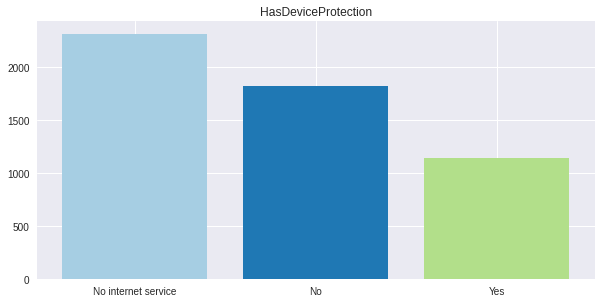

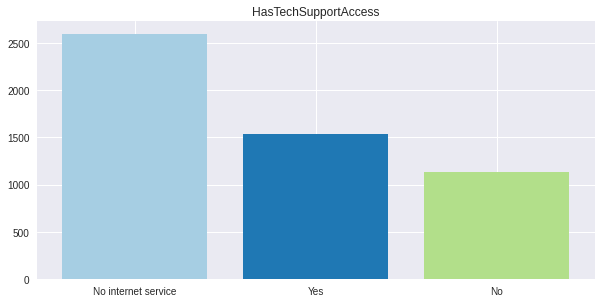

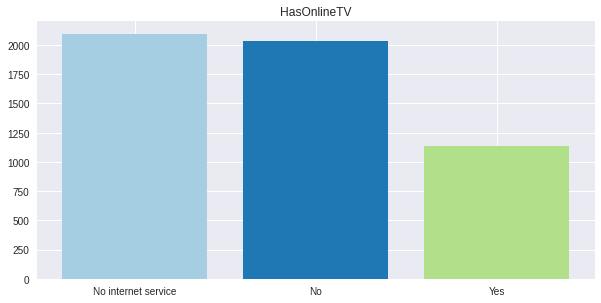

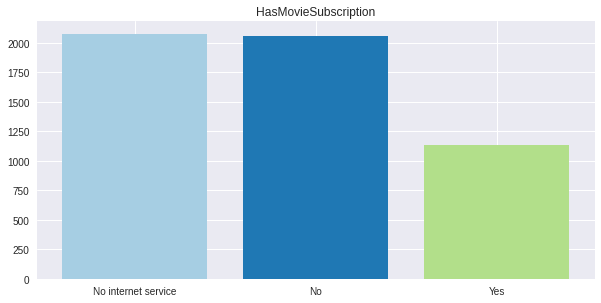

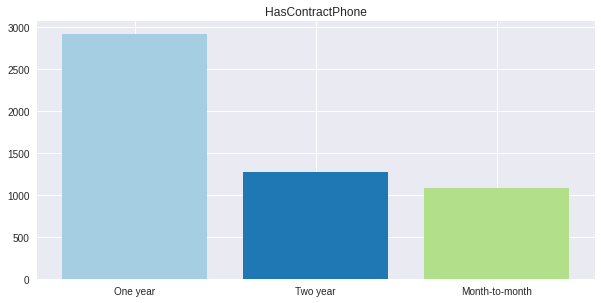

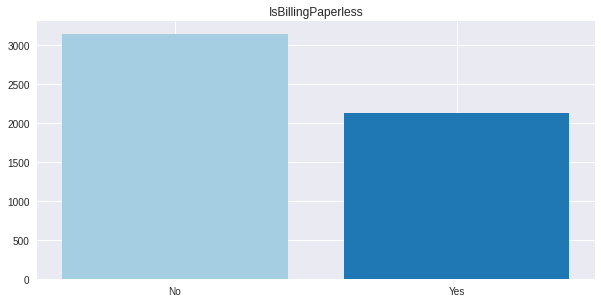

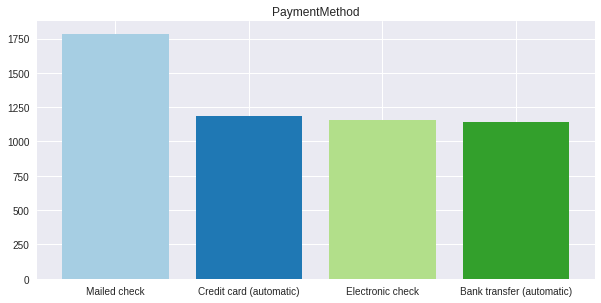

In [ ]:
for i,cat in enumerate(cat_cols):
  plt.figure(figsize=(10,90))
  plt.subplot(len(cat_cols),1,i+1)
  plt.bar(data[cat].unique(),data[cat].value_counts(),color=plt.get_cmap('Paired').colors)
  plt.title(cat)

In [ ]:
import seaborn as sns

Посмотрим в процентах на распределение целевого признака


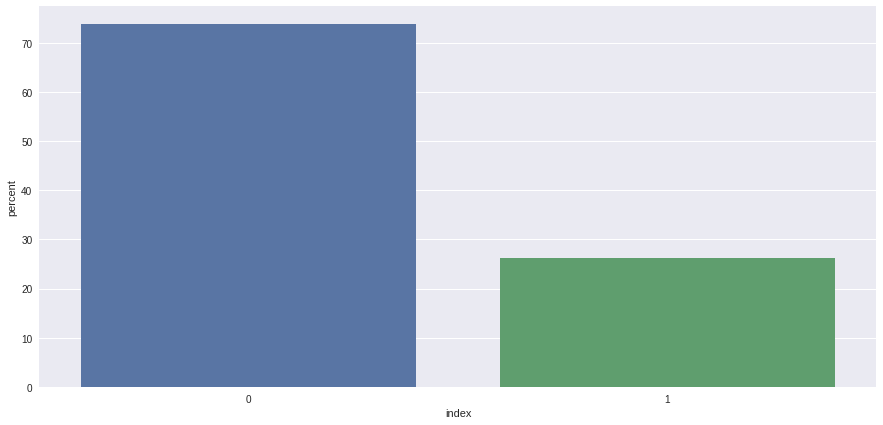

In [ ]:
norm_target = (data[target_col].value_counts(normalize=True).mul(100).rename('percent').reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

In [ ]:
norm_target

,index,percent
0,0,73.753082
1,1,26.246918


Видно, что целевая переменная распределена не равномерно

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
import seaborn as sns

Дополнительно посмотрим матрицу корреляции:


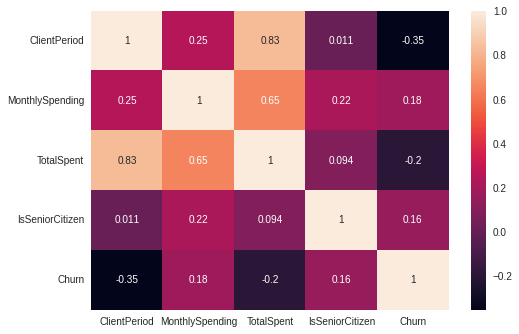

In [ ]:
corr_matrix = data.loc[:,:].corr()
sns.heatmap(corr_matrix, annot=True)


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder,LabelBinarizer
from sklearn.pipeline import make_pipeline

Отнормируем числовые признаки и закодируем категориальные

In [ ]:
categ_data = pd.get_dummies(data[cat_cols])

In [ ]:
X = pd.concat([data[num_cols], categ_data], axis=1)
y = data[target_col]

Разделим выборку на обучающую и тренировочную, создадим пайплан с StandardScaler и LogisticRegressionCV и обучим

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    train_size=0.8)

In [ ]:
pipe = make_pipeline(  
    StandardScaler(), 
    LogisticRegression()
)

In [ ]:
grid_log = GridSearchCV(
    pipe,
    {'logisticregression__C':np.logspace(-3, 2, 30)},
    scoring='roc_auc'
)

In [ ]:
grid_log.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02])},
             scoring='roc_auc')

In [ ]:
grid_log.best_params_

{'logisticregression__C': 13.738237958832638}

In [ ]:
roc_auc_score(y_val,grid_log.predict_proba(X_val)[:,1])

0.8557850747908237

Лучший результат 0.8521891955649917 с параметром С=13.738237958832638

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
import catboost

In [ ]:
cls = catboost.CatBoostClassifier(eval_metric = 'AUC')

In [ ]:
X = data.iloc[:,:-1]

In [ ]:
y = data.iloc[:,-1]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8)

In [ ]:
cls.fit(X_train,y_train,cat_features = cat_cols)

Learning rate set to 0.019048
0:	total: 81.5ms	remaining: 1m 21s
1:	total: 120ms	remaining: 59.8s
2:	total: 153ms	remaining: 51s
3:	total: 204ms	remaining: 50.9s
4:	total: 240ms	remaining: 47.7s
5:	total: 274ms	remaining: 45.4s
6:	total: 300ms	remaining: 42.5s
7:	total: 334ms	remaining: 41.4s
8:	total: 364ms	remaining: 40.1s
9:	total: 397ms	remaining: 39.3s
10:	total: 423ms	remaining: 38s
11:	total: 439ms	remaining: 36.2s
12:	total: 465ms	remaining: 35.3s
13:	total: 497ms	remaining: 35s
14:	total: 510ms	remaining: 33.5s
15:	total: 550ms	remaining: 33.8s
16:	total: 586ms	remaining: 33.9s
17:	total: 599ms	remaining: 32.7s
18:	total: 629ms	remaining: 32.5s
19:	total: 669ms	remaining: 32.8s
20:	total: 701ms	remaining: 32.7s
21:	total: 734ms	remaining: 32.6s
22:	total: 764ms	remaining: 32.5s
23:	total: 796ms	remaining: 32.4s
24:	total: 842ms	remaining: 32.8s
25:	total: 878ms	remaining: 32.9s
26:	total: 914ms	remaining: 32.9s
27:	total: 934ms	remaining: 32.4s
28:	total: 963ms	remaining: 32.2

In [ ]:
roc_auc_score(y_valid,cls.predict_proba(X_valid)[:,1])

0.823988458259558

In [ ]:
model = catboost.CatBoostClassifier(cat_features = cat_cols,eval_metric='AUC')

In [ ]:
grid = {'n_estimators': [10,50,100,200,300], 
        'learning_rate':[0.003,0.01,0.1,1]}

In [ ]:
grid_res = GridSearchCV(model,grid,scoring='roc_auc')

In [ ]:
grid_res.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
100:	total: 1.22s	remaining: 2.4s
101:	total: 1.23s	remaining: 2.39s
102:	total: 1.24s	remaining: 2.38s
103:	total: 1.26s	remaining: 2.37s
104:	total: 1.28s	remaining: 2.38s
105:	total: 1.29s	remaining: 2.36s
106:	total: 1.3s	remaining: 2.35s
107:	total: 1.31s	remaining: 2.34s
108:	total: 1.33s	remaining: 2.33s
109:	total: 1.34s	remaining: 2.32s
110:	total: 1.35s	remaining: 2.31s
111:	total: 1.36s	remaining: 2.29s
112:	total: 1.38s	remaining: 2.28s
113:	total: 1.39s	remaining: 2.27s
114:	total: 1.4s	remaining: 2.25s
115:	total: 1.42s	remaining: 2.25s
116:	total: 1.43s	remaining: 2.23s
117:	total: 1.44s	remaining: 2.22s
118:	total: 1.45s	remaining: 2.21s
119:	total: 1.48s	remaining: 2.21s
120:	total: 1.49s	remaining: 2.2s
121:	total: 1.5s	remaining: 2.19s
122:	total: 1.51s	remaining: 2.18s
123:	total: 1.52s	remaining: 2.16s
124:	total: 1.54s	remaining: 2.15s
125:	total: 1.55s	remaining: 2.14s
126:	total: 1.56s	remaining: 2.13s
127:	tota

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7fd5823f4a50>,
             param_grid={'learning_rate': [0.003, 0.01, 0.1, 1],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='roc_auc')

In [ ]:
grid_res.best_params_

{'learning_rate': 0.01, 'n_estimators': 300}

In [ ]:
cls = catboost.CatBoostClassifier(learning_rate=0.01,n_estimators=300,eval_metric='AUC',cat_features = cat_cols)

In [ ]:
cls.fit(X_train,y_train)

0:	total: 47.1ms	remaining: 14.1s
1:	total: 87.1ms	remaining: 13s
2:	total: 127ms	remaining: 12.5s
3:	total: 145ms	remaining: 10.7s
4:	total: 162ms	remaining: 9.55s
5:	total: 194ms	remaining: 9.52s
6:	total: 224ms	remaining: 9.38s
7:	total: 268ms	remaining: 9.78s
8:	total: 308ms	remaining: 9.95s
9:	total: 322ms	remaining: 9.34s
10:	total: 345ms	remaining: 9.07s
11:	total: 370ms	remaining: 8.88s
12:	total: 400ms	remaining: 8.83s
13:	total: 445ms	remaining: 9.1s
14:	total: 486ms	remaining: 9.24s
15:	total: 517ms	remaining: 9.18s
16:	total: 559ms	remaining: 9.3s
17:	total: 574ms	remaining: 8.99s
18:	total: 593ms	remaining: 8.78s
19:	total: 613ms	remaining: 8.58s
20:	total: 642ms	remaining: 8.54s
21:	total: 670ms	remaining: 8.47s
22:	total: 706ms	remaining: 8.5s
23:	total: 713ms	remaining: 8.2s
24:	total: 731ms	remaining: 8.04s
25:	total: 750ms	remaining: 7.91s
26:	total: 766ms	remaining: 7.75s
27:	total: 819ms	remaining: 7.96s
28:	total: 872ms	remaining: 8.15s
29:	total: 899ms	remaining: 

In [ ]:
roc_auc_score(y_valid,cls.predict_proba(X_valid)[:,1])

0.8284711878062262

In [ ]:
model = catboost.CatBoostClassifier(cat_features = cat_cols,eval_metric='AUC',learning_rate=0.01,n_estimators=300)

In [ ]:
grid = {'max_depth': [1,2,3,4,5,10], 
        'l2_leaf_reg': np.linspace(3, 3.5, 5)}

In [ ]:
grid_res = GridSearchCV(model,grid,scoring='roc_auc')

In [ ]:
grid_res.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
100:	total: 559ms	remaining: 1.1s
101:	total: 564ms	remaining: 1.09s
102:	total: 569ms	remaining: 1.09s
103:	total: 574ms	remaining: 1.08s
104:	total: 579ms	remaining: 1.07s
105:	total: 584ms	remaining: 1.07s
106:	total: 588ms	remaining: 1.06s
107:	total: 594ms	remaining: 1.06s
108:	total: 599ms	remaining: 1.05s
109:	total: 604ms	remaining: 1.04s
110:	total: 610ms	remaining: 1.04s
111:	total: 614ms	remaining: 1.03s
112:	total: 619ms	remaining: 1.02s
113:	total: 624ms	remaining: 1.02s
114:	total: 629ms	remaining: 1.01s
115:	total: 634ms	remaining: 1s
116:	total: 639ms	remaining: 1s
117:	total: 644ms	remaining: 994ms
118:	total: 650ms	remaining: 988ms
119:	total: 655ms	remaining: 982ms
120:	total: 660ms	remaining: 976ms
121:	total: 664ms	remaining: 969ms
122:	total: 670ms	remaining: 964ms
123:	total: 675ms	remaining: 958ms
124:	total: 684ms	remaining: 958ms
125:	total: 693ms	remaining: 957ms
126:	total: 702ms	remaining: 956ms
127:	total:

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7fd5823e8f50>,
             param_grid={'l2_leaf_reg': array([3.   , 3.125, 3.25 , 3.375, 3.5  ]),
                         'max_depth': [1, 2, 3, 4, 5, 10]},
             scoring='roc_auc')

In [ ]:
grid_res.best_params_

{'l2_leaf_reg': 3.25, 'max_depth': 5}

In [ ]:
cls = catboost.CatBoostClassifier(l2_leaf_reg = 3.25, max_depth= 5,learning_rate=0.01,n_estimators=300,eval_metric='AUC',cat_features = cat_cols)

In [ ]:
cls.fit(X_train,y_train)

0:	total: 31.6ms	remaining: 9.44s
1:	total: 54.7ms	remaining: 8.15s
2:	total: 61.8ms	remaining: 6.11s
3:	total: 76.3ms	remaining: 5.65s
4:	total: 96.2ms	remaining: 5.67s
5:	total: 113ms	remaining: 5.54s
6:	total: 135ms	remaining: 5.63s
7:	total: 157ms	remaining: 5.72s
8:	total: 183ms	remaining: 5.92s
9:	total: 209ms	remaining: 6.06s
10:	total: 223ms	remaining: 5.87s
11:	total: 242ms	remaining: 5.8s
12:	total: 257ms	remaining: 5.68s
13:	total: 284ms	remaining: 5.79s
14:	total: 308ms	remaining: 5.85s
15:	total: 332ms	remaining: 5.9s
16:	total: 360ms	remaining: 6s
17:	total: 379ms	remaining: 5.94s
18:	total: 404ms	remaining: 5.97s
19:	total: 418ms	remaining: 5.85s
20:	total: 430ms	remaining: 5.71s
21:	total: 460ms	remaining: 5.81s
22:	total: 474ms	remaining: 5.71s
23:	total: 488ms	remaining: 5.61s
24:	total: 502ms	remaining: 5.52s
25:	total: 525ms	remaining: 5.53s
26:	total: 535ms	remaining: 5.41s
27:	total: 557ms	remaining: 5.41s
28:	total: 579ms	remaining: 5.41s
29:	total: 600ms	remaini

In [ ]:
roc_auc_score(y_valid,cls.predict_proba(X_valid)[:,1])

0.8280777193820673

In [ ]:
cls = catboost.CatBoostClassifier(l2_leaf_reg = 3.25, max_depth= 5,learning_rate=0.01,n_estimators=300,eval_metric='AUC',cat_features = cat_cols)

In [ ]:
cls.fit(X,y)

0:	total: 33.4ms	remaining: 9.99s
1:	total: 46.6ms	remaining: 6.94s
2:	total: 80.1ms	remaining: 7.93s
3:	total: 102ms	remaining: 7.57s
4:	total: 135ms	remaining: 7.95s
5:	total: 151ms	remaining: 7.4s
6:	total: 167ms	remaining: 6.98s
7:	total: 182ms	remaining: 6.63s
8:	total: 207ms	remaining: 6.69s
9:	total: 250ms	remaining: 7.25s
10:	total: 265ms	remaining: 6.97s
11:	total: 301ms	remaining: 7.23s
12:	total: 331ms	remaining: 7.32s
13:	total: 363ms	remaining: 7.42s
14:	total: 393ms	remaining: 7.46s
15:	total: 432ms	remaining: 7.66s
16:	total: 468ms	remaining: 7.79s
17:	total: 484ms	remaining: 7.59s
18:	total: 523ms	remaining: 7.73s
19:	total: 549ms	remaining: 7.68s
20:	total: 592ms	remaining: 7.86s
21:	total: 609ms	remaining: 7.69s
22:	total: 637ms	remaining: 7.67s
23:	total: 671ms	remaining: 7.72s
24:	total: 715ms	remaining: 7.87s
25:	total: 757ms	remaining: 7.97s
26:	total: 793ms	remaining: 8.01s
27:	total: 818ms	remaining: 7.94s
28:	total: 855ms	remaining: 7.99s
29:	total: 894ms	remai

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = cls

In [ ]:
X_test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- HasChild
- HasContractPhone
- HasDeviceProtection
- HasInternetService
- HasMovieSubscription
- ...
Feature names seen at fit time, yet now missing:
- HasChild_No
- HasChild_Yes
- HasContractPhone_Month-to-month
- HasContractPhone_One year
- HasContractPhone_Two year
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')


In [ ]:
submission['Churn'] = best_model.predict_proba(X_test)[:,1] 
submission.to_csv('./my_submission.csv',index=False)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
best_model = grid_log

In [ ]:
dummy_cats = pd.get_dummies(X_test[cat_cols])

In [ ]:
dummy_cats

,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1,1,0,1,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
2,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,1,0,0,1,0,1,0,1,0,...,0,0,0,1,1,0,0,1,0,0
4,0,1,0,0,1,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,0,1,0,0,1,1,0,0,1,0,...,1,0,0,1,0,1,1,0,0,0
1757,0,1,0,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,1
1758,0,0,1,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1759,0,1,0,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0


In [ ]:
test = pd.concat([X_test[num_cols], dummy_cats], axis=1)

In [ ]:
test = test.replace(' ', 0)

In [ ]:
test

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.10,2386.85,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,29,98.50,3004.15,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
2,9,76.25,684.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,67,74.00,4868.4,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
4,71,20.10,1389.6,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555,0,1,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,0
1757,13,20.85,272.35,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
1758,2,91.45,171.45,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1759,19,89.10,1620.8,0,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0


In [ ]:
test['TotalSpent'] = pd.to_numeric(test['TotalSpent'])

In [ ]:
test

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.10,2386.85,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,29,98.50,3004.15,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
2,9,76.25,684.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,67,74.00,4868.40,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
4,71,20.10,1389.60,0,1,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.00,0,1,0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,0
1757,13,20.85,272.35,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
1758,2,91.45,171.45,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1759,19,89.10,1620.80,0,1,0,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0


In [ ]:
submission['Churn'] = best_model.predict_proba(test)[:,1] 
submission.to_csv('./my_submission.csv',index=False)

In [ ]:
best_model.best_params_

{'logisticregression__C': 13.738237958832638}

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.